In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
dictDf = pd.read_excel('Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2013.xls'
                       ,sheetname = [2,3,4,5,6,7], header = 0)


In [3]:
dictDf[3].head(3)

,Généralistes et COMPETENCE MEP,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (euros),DEPASSEMENTS (euros),FRAIS DE DEPLACEMENTS (euros),HONORAIRES TOTAUX (euros),NOMBRE DE DEPASSEMENTS,DEPASSEMENT MOYEN (euros)
0,01- Médecine générale,01- Ain,390,54611476,583275,297951,55492702,76286,7
1,01- Médecine générale,02- Aisne,366,63385345,385176,368001,64138522,67037,5
2,01- Médecine générale,03- Allier,257,35083665,67697,325877,35477239,17797,3


In [4]:
for key, value in dictDf.iteritems():
    name = (value.columns.values)[0]
    value.rename(columns={name: 'PROFESSION'}, inplace=True)

In [5]:
df = pd.concat(dictDf)
df.head(3)

PROFESSION DEPARTEMENT  EFFECTIFS  \
2 0  02- Anesthésie-réanimation chirurgicale     01- Ain         17   
  1  02- Anesthésie-réanimation chirurgicale   02- Aisne         22   
  2  02- Anesthésie-réanimation chirurgicale  03- Allier         19   

    HONORAIRES SANS DEPASSEMENT (euros) DEPASSEMENTS (euros)  \
2 0                             4329488              1879396   
  1                             4615160               191421   
  2                             4872085               416466   

    FRAIS DE DEPLACEMENTS (euros) HONORAIRES TOTAUX (euros)  \
2 0                             0                   6208884   
  1                           119                   4806700   
  2                             0                   5288551   

    NOMBRE DE DEPASSEMENTS DEPASSEMENT MOYEN (euros)  
2 0                  27995                        67  
  1                   8150                        23  
  2                   9479                        43

In [6]:
df.reset_index(drop=[0,1], inplace = True)
df.head(5)

,PROFESSION,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (euros),DEPASSEMENTS (euros),FRAIS DE DEPLACEMENTS (euros),HONORAIRES TOTAUX (euros),NOMBRE DE DEPASSEMENTS,DEPASSEMENT MOYEN (euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4329488,1879396,0,6208884,27995,67
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,4615160,191421,119,4806700,8150,23
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,4872085,416466,0,5288551,9479,43
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4,nc,nc,nc,nc,nc,nc
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,7,nc,nc,nc,nc,nc,nc


In [7]:
df.size

161298

In [8]:
subDf = df.loc[:, ['PROFESSION', 'DEPARTEMENT', 'NOMBRE DE DEPASSEMENTS', 'EFFECTIFS']]
subDf.replace(to_replace = r'- ', value = r'\s- ', inplace = True)
print subDf.shape
subDf.head(5)

(17922, 4)


/cal/softs/anaconda/anaconda-2.0.1/lib/python2.7/site-packages/pandas/core/common.py:516: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,PROFESSION,DEPARTEMENT,NOMBRE DE DEPASSEMENTS,EFFECTIFS
0,02- Anesthésie-réanimation chirurgicale,01- Ain,27995,17
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,8150,22
2,02- Anesthésie-réanimation chirurgicale,03- Allier,9479,19
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,nc,4
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,nc,7


In [9]:
subDf.replace(to_replace = 'nc', value = np.nan, inplace = True)
subDf.head(5)

,PROFESSION,DEPARTEMENT,NOMBRE DE DEPASSEMENTS,EFFECTIFS
0,02- Anesthésie-réanimation chirurgicale,01- Ain,27995,17
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,8150,22
2,02- Anesthésie-réanimation chirurgicale,03- Allier,9479,19
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,NaN,4
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,NaN,7


In [10]:
subDf.dropna(how='any', inplace=True)
subDf.head(5)

,PROFESSION,DEPARTEMENT,NOMBRE DE DEPASSEMENTS,EFFECTIFS
0,02- Anesthésie-réanimation chirurgicale,01- Ain,27995,17
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,8150,22
2,02- Anesthésie-réanimation chirurgicale,03- Allier,9479,19
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110114,105
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,12231,21


In [11]:
subDffilter = subDf[subDf['DEPARTEMENT'].str.contains(r'^TOTAL.*$')== False]
subDffilter2 = subDffilter[subDffilter['PROFESSION'].str.contains(r'^TOTAL.*$')== False]
subDffilter3 = subDffilter2[subDffilter2['NOMBRE DE DEPASSEMENTS'] != 0]

In [12]:
df2 = subDffilter3.groupby(['DEPARTEMENT'], as_index=False)['EFFECTIFS'].sum()
dfTotal = pd.DataFrame(df2)
dfTotal.columns = ['DEPARTEMENT', 'TOTAL EFFECTIF']
dfTotal.head(5)

,DEPARTEMENT,TOTAL EFFECTIF
0,01- Ain,2990
1,02- Aisne,2533
2,03- Allier,2010
3,04- Alpes-Hte-Provence,1166
4,05- Hautes-Alpes,1083


In [13]:
result = pd.merge(subDffilter3, dfTotal,how = 'inner', on='DEPARTEMENT' )

In [14]:
result.head(5)

,PROFESSION,DEPARTEMENT,NOMBRE DE DEPASSEMENTS,EFFECTIFS,TOTAL EFFECTIF
0,02- Anesthésie-réanimation chirurgicale,01- Ain,27995,17,2990
1,03- Pathologie cardio-vasculaire,01- Ain,11550,16,2990
2,05- Dermato-vénéréologie,01- Ain,20491,13,2990
3,06- Radiodiagnostic et imagerie médicale,01- Ain,84364,41,2990
4,07- Gynécologie obstétrique,01- Ain,34620,20,2990


In [15]:
result['DENSITE'] = pd.Series( result['EFFECTIFS'] / result['TOTAL EFFECTIF'], index=result.index)

In [16]:
result.head(5)

,PROFESSION,DEPARTEMENT,NOMBRE DE DEPASSEMENTS,EFFECTIFS,TOTAL EFFECTIF,DENSITE
0,02- Anesthésie-réanimation chirurgicale,01- Ain,27995,17,2990,0.005686
1,03- Pathologie cardio-vasculaire,01- Ain,11550,16,2990,0.005351
2,05- Dermato-vénéréologie,01- Ain,20491,13,2990,0.004348
3,06- Radiodiagnostic et imagerie médicale,01- Ain,84364,41,2990,0.013712
4,07- Gynécologie obstétrique,01- Ain,34620,20,2990,0.006689


In [17]:
result.drop('EFFECTIFS', axis=1, inplace=True)
result.drop('TOTAL EFFECTIF', axis=1, inplace=True)

In [18]:
result.head(5)

,PROFESSION,DEPARTEMENT,NOMBRE DE DEPASSEMENTS,DENSITE
0,02- Anesthésie-réanimation chirurgicale,01- Ain,27995,0.005686
1,03- Pathologie cardio-vasculaire,01- Ain,11550,0.005351
2,05- Dermato-vénéréologie,01- Ain,20491,0.004348
3,06- Radiodiagnostic et imagerie médicale,01- Ain,84364,0.013712
4,07- Gynécologie obstétrique,01- Ain,34620,0.006689


In [19]:
subDF = result.groupby(['DEPARTEMENT', 'PROFESSION'])['NOMBRE DE DEPASSEMENTS'].mean()
frame1 = pd.DataFrame(subDF)
frame1 = frame1.sort('NOMBRE DE DEPASSEMENTS', axis=0, ascending=False)
frame1.head(5)

NOMBRE DE DEPASSEMENTS
DEPARTEMENT        PROFESSION                                                         
75- Paris (Ville)  26- Masseurs-kinésithérapeutes-rééducateurs                 3429673
                   01- OMNIPRATICIENS                                          2727344
                   01- Médecine générale                                       1880437
92- Hauts-de-Seine 26- Masseurs-kinésithérapeutes-rééducateurs                 1625487
                   01- OMNIPRATICIENS                                          1518491

In [20]:
subDF = result.groupby(['DEPARTEMENT', 'PROFESSION'])['DENSITE'].mean()
frame2 = pd.DataFrame(subDF)
frame2 = frame2.sort('DENSITE', axis=0, ascending=False)
frame2.head(5)

,,DENSITE
DEPARTEMENT,PROFESSION,
976- Mayotte,24- Infirmiers,0.557214
23- Creuse,24- Infirmiers,0.388535
2B- Haute-Corse,24- Infirmiers,0.384185
972- Martinique,24- Infirmiers,0.381373
971- Guadeloupe,24- Infirmiers,0.341517


<p>
On constate dans ce deuxième dataframe que les infirmier est ma specialite qui a la plus grande densite, alors qu'elle n'apparait pas dans les specialite avec un depassement d'honoraire.
</p>

In [21]:
subDF1 = result.groupby(['DEPARTEMENT', 'PROFESSION'], as_index = False)['DENSITE'].mean()
subDF1.head(5)

,DEPARTEMENT,PROFESSION,DENSITE
0,01- Ain,01- M.E.P.,0.018729
1,01- Ain,01- Médecine générale,0.130435
2,01- Ain,01- OMNIPRATICIENS,0.149164
3,01- Ain,02- Anesthésie-réanimation chirurgicale,0.005686
4,01- Ain,03- Pathologie cardio-vasculaire,0.005351


In [22]:
subDf2 = subDF1.replace(to_replace = '24- Infirmiers', value = np.nan)
subDf2 = subDf2.dropna(how='any')
subDF3 = subDf2.groupby(['DEPARTEMENT', 'PROFESSION'])['DENSITE'].mean()
subDF3 = pd.DataFrame(subDF3)
subDF3 = subDF3.sort('DENSITE', axis=0, ascending=False)
subDF3.head(5)

,,DENSITE
DEPARTEMENT,PROFESSION,
05- Hautes-Alpes,26- Masseurs-kinésithérapeutes-rééducateurs,0.226223
70- Haute-Saône,01- OMNIPRATICIENS,0.209693
52- Haute-Marne,01- OMNIPRATICIENS,0.207895
55- Meuse,01- OMNIPRATICIENS,0.205619
39- Jura,01- OMNIPRATICIENS,0.202510


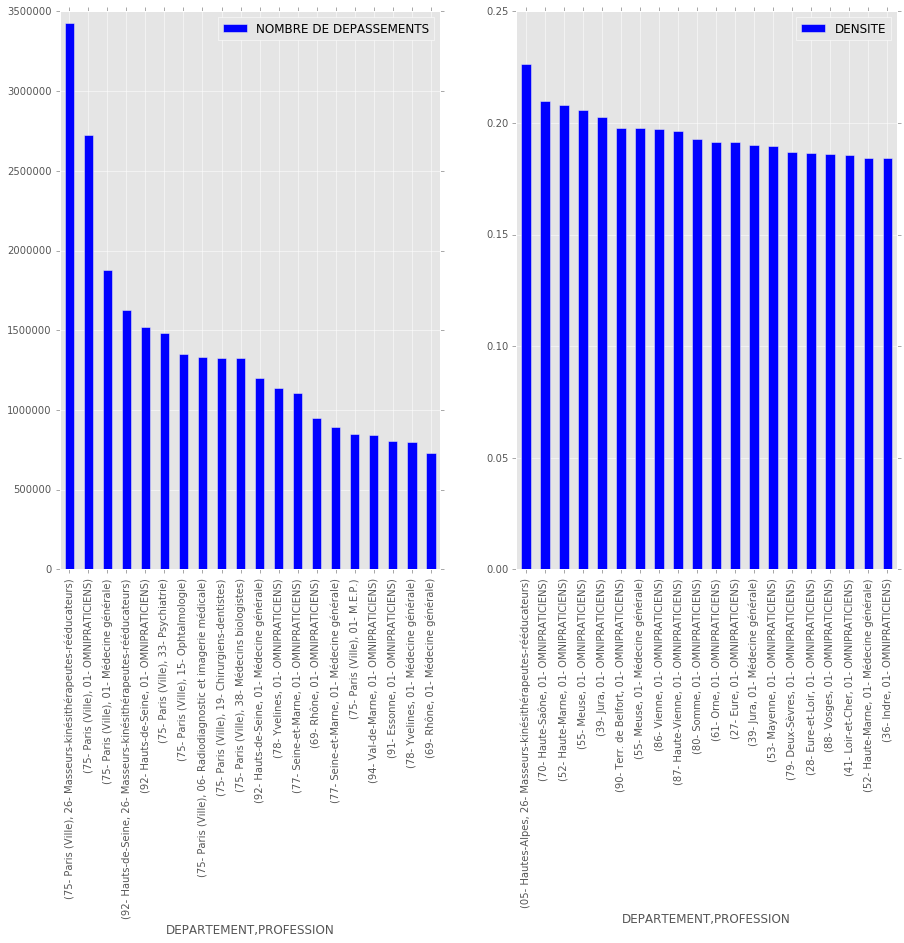

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2)
frame1.head(20).plot(ax=axes[0], kind='bar', figsize=(15,10))
subDF3.head(20).plot(ax=axes[1], kind='bar', figsize=(15,10))

<p>
Lorsque l'on retire les infirmiers des données, on remarque qu'<b>il n'y a pas de corrélation entre la densité de médecins par spécialité  et par territoire et la pratique du dépassement d'honoraires.</b>
<br\><br\>
Dans les graphes ci-dessus, on constate que la densite des Masseurs-kinésithérapeutes-rééducateurs est en corrélation avec leur nombre de dépassement, mais il ne sont pas liées par le departement.
<br\><br\>
De plus, sur le graphe de gauche, on constate que les omnipraticiens de Paris ont un fort nombre de depassement, mais ils n'apparaissent meme pas dans le top 20 des densite par  specialite et par departement.
</p>

In [24]:
densDf = pd.read_excel('densitePop.xls', skiprows=6, header=0)
densDf.columns = ['CODEGEO', 'DEPARTEMENT', 'DENSITE DE POPULATION']
densDf.head(5)

,CODEGEO,DEPARTEMENT,DENSITE DE POPULATION
0,1,01 - Ain,106.24
1,2,02 - Aisne,73.40
2,3,03 - Allier,46.72
3,4,04 - Alpes-de-Haute-Provence,23.28
4,5,05 - Hautes-Alpes,25.15


In [25]:
subDensDf = densDf.loc[:, ['DEPARTEMENT', 'DENSITE DE POPULATION']]
subDensDf.shape

(104, 2)

In [26]:
dropDensDf = subDensDf.dropna(how='any')
dropDensDf.shape

(100, 2)

In [27]:
dropDensDf['DEPARTEMENT'] = dropDensDf['DEPARTEMENT'].str.replace('75- Ville de Paris', '75- Paris (Ville)')

/cal/softs/anaconda/anaconda-2.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
dropDensDf['DEPARTEMENT'] = dropDensDf['DEPARTEMENT'].str.replace(' - ', '- ')
dropDensDf.head(5)

/cal/softs/anaconda/anaconda-2.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,DEPARTEMENT,DENSITE DE POPULATION
0,01- Ain,106.24
1,02- Aisne,73.40
2,03- Allier,46.72
3,04- Alpes-de-Haute-Provence,23.28
4,05- Hautes-Alpes,25.15


In [29]:
subDffilter3.replace(to_replace = '75- Paris (Ville)', value = '75- Ville de Paris', inplace = True)
subDffilter3.head(5)

/cal/softs/anaconda/anaconda-2.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,PROFESSION,DEPARTEMENT,NOMBRE DE DEPASSEMENTS,EFFECTIFS
0,02- Anesthésie-réanimation chirurgicale,01- Ain,27995,17
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,8150,22
2,02- Anesthésie-réanimation chirurgicale,03- Allier,9479,19
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110114,105
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,12231,21


In [31]:
t = newResult.groupby(['DEPARTEMENT'])['DENSITE DE POPULATION'].mean()
frame1 = pd.DataFrame(t)
frame1 = frame1.sort('DENSITE DE POPULATION', axis=0, ascending=False)
frame1.head(5)

,DENSITE DE POPULATION
DEPARTEMENT,
75- Ville de Paris,21258.26
92- Hauts-de-Seine,9033.85
94- Val-de-Marne,5476.19
95- Val-d'Oise,952.78
91- Essonne,685.83


In [32]:
t = newResult.groupby(['DEPARTEMENT'])['NOMBRE DE DEPASSEMENTS'].mean()
frame2 = pd.DataFrame(t)
frame2 = frame2.sort('NOMBRE DE DEPASSEMENTS', axis=0, ascending=False)
frame2.head(5)

,NOMBRE DE DEPASSEMENTS
DEPARTEMENT,
75- Ville de Paris,396389.363636
92- Hauts-de-Seine,201734.872340
78- Yvelines,176894.526316
69- Rhône,153214.065217
77- Seine-et-Marne,141181.914286


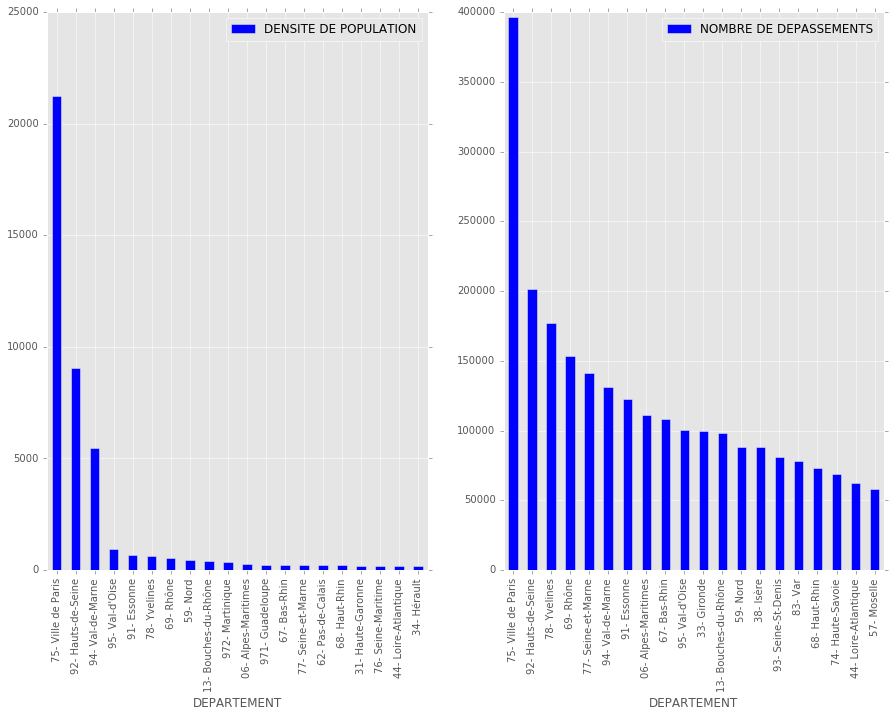

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2)
frame1.head(20).plot(ax=axes[0], kind='bar', figsize=(15,10))
frame2.head(20).plot(ax=axes[1], kind='bar', figsize=(15,10))

<p>
On constate qu'il y a une correlation entre la densite de population et le nombre de depassement seulement pour les deux meilleurs resultats: Paris 75 et les Hauts-de-Seine 92.

Cependant cette corrélation n'est pas valide pour les autres départements.

<b>Conclusion</b>: Il n'y a pas de correlation entre la densite de population et le nombre de depassement par departement
</p>